In [1]:
from antelope_catalog import LcCatalog
cat = LcCatalog('/data/GitHub/2018/bw2-uncertainty/catalog/', quell_biogenic_co2=True)

Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/flowable_synlist.json:
Loading JSON data from /data/GitHub/lca-tools/lcatools/qdb/data/quantity_synlist.json:
local.qdb: /data/GitHub/2018/bw2-uncertainty/catalog/reference-quantities.json
Loading JSON data from /data/GitHub/2018/bw2-uncertainty/catalog/reference-quantities.json:
local.qdb: /data/GitHub/lca-tools/lcatools/providers/data/elcd_reference_quantities.json
5 new flow entities added (5 total)
24 new quantity entities added (24 total)


In [2]:
cat.qdb.quell_biogenic_co2

True

In [3]:
from lcatools import enum

In [4]:
recipes = enum(cat.query('local.lcia').lcia_methods(Method='recipe midpoint \(H\)$'))

local.lcia.ecoinvent.3.1.2014_08_13: /data/LCI/LCIA implementation v3.1 2014_08_13.xlsx
Loading /data/LCI/LCIA implementation v3.1 2014_08_13.xlsx
3255 new flow entities added (3255 total)
702 new quantity entities added (702 total)
 [00] local.lcia.ecoinvent.3.1.2014_08_13/ReCiPe Midpoint (H), climate change, GWP100 ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq]
 [01] local.lcia.ecoinvent.3.1.2014_08_13/ReCiPe Midpoint (H), terrestrial acidification, TAP100 ReCiPe Midpoint (H), terrestrial acidification, TAP100 [kg SO2-Eq]
 [02] local.lcia.ecoinvent.3.1.2014_08_13/ReCiPe Midpoint (H), photochemical oxidant formation, POFP ReCiPe Midpoint (H), photochemical oxidant formation, POFP [kg NMVOC]
 [03] local.lcia.ecoinvent.3.1.2014_08_13/ReCiPe Midpoint (H), particulate matter formation, PMFP ReCiPe Midpoint (H), particulate matter formation, PMFP [kg PM10-Eq]
 [04] local.lcia.ecoinvent.3.1.2014_08_13/ReCiPe Midpoint (H), fossil depletion, FDP ReCiPe Midpoint (H), fossil depletion,

In [5]:
mass = next(cat.query('local.lcia').quantities(Name='^mass'))

In [6]:
cat.qdb._q.add_synonyms('Mass', mass.uuid)

12

In [7]:
m_gly = cat.query('local.ecoinvent.3.4.cutoff').get('037fa5e4-f711-4987-b50a-38920ca5d5a0')

Loading JSON data from /data/GitHub/2018/bw2-uncertainty/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz:
local.ecoinvent.3.4.cutoff.index__20180905: /data/GitHub/2018/bw2-uncertainty/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz
local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02
4881 new flow entities added (4881 total)
19 new quantity entities added (19 total)
13459 new process entities added (13459 total)


In [132]:
inv=enum(m_gly.market.inventory(m_gly.market.reference()))

 [00]  Input:     [0.209 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]
 [01]  Input:     [0.599 [metric ton*km]] (#) transport, freight, sea, transoceanic ship [CPC: 65219: Other coastal and transoceanic water transport services of other freight]
 [02]  Input:     [0.309 [metric ton*km]] (#) transport, freight train [CPC: 6512: Railway transport services of freight]
 [03]  Input:     [0.0246 [metric ton*km]] (#) transport, freight, inland waterways, barge [CPC: 65229: Other inland water transport services of freight]
 [04]  Input:     [0.000235 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]
 [05]  Input:     [0.121 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]
 [06]  Input:     [0.00259 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]
 [07]  Input:     [0.11 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]
 [08]  Input:     [0.0623 [kg]] (#) glycerine (CAS 000056-81-5) [C

In [133]:
cat.query('local.ecoinvent.3.4.cutoff').get(inv[14].termination).show()

ProcessRef catalog reference (7ed9f79a-2672-4320-8bfa-b3ed4ba3ee57)
origin: local.ecoinvent.3.4.cutoff
UUID: 7ed9f79a-2672-4320-8bfa-b3ed4ba3ee57
   Name: esterification of soybean oil
Comment: This dataset represents the production of soybean methyl ester, respectively glycerine, from crude soybean oil. Density of methyl ester = 0.88 kg/l
[This dataset is meant to replace the following datasets:
 - esterification of soybean oil, GLO, 1996 - 2006 (c7db84b0-b930-47ef-91bd-36026a06f5e6)]
==Local Fields==
           Name: esterification of soybean oil
   SpatialScope: RoW
  TemporalScope: {'begin': '2009-01-01', 'end': '2017-12-31'}
Classifications: ['EcoSpold01Categories: biomass/fuels', 'ISIC rev.4 ecoinvent: 19a: Liquid and gaseous fuels from biomass']
        Comment: This dataset represents the production of soybean methyl ester, respectively glycerine, from crude soybean oil. Density of methyl ester = 0.88 kg/l
[This dataset is meant to replace the following datasets:
 - esterificat

In [126]:
res = recipes[0].do_lcia(m_gly.market.lci(), refresh=True)

completed 63 iterations
Multiple CFs found: [22.25, 25.0]
Flow: local.ecoinvent.3.4.cutoff/baf58fc9-573c-419c-8c16-831ac03203b9 Methane, non-fossil [kg] [[kg]]
Quantity: ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]
Multiple CFs found: [25.0, 22.25]
Flow: local.ecoinvent.3.4.cutoff/57bdb443-d4a6-423d-8024-959b8261d02e Methane, non-fossil [kg] [[kg]]
Quantity: ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]
Multiple CFs found: [25.0, 22.25]
Flow: local.ecoinvent.3.4.cutoff/da1157e2-7593-4dfd-80dd-a3449b37a4d8 Methane, non-fossil [kg] [[kg]]
Quantity: ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA]


In [128]:
res.show_components()

ReCiPe Midpoint (H), climate change, GWP100 [kg CO2-Eq] [LCIA] kg CO2-Eq
------------------------------------------------------------
      1.33  local.ecoinvent.3.4.cutoff/78eb1859-abd9-44c6-9ce3-f3b5b33d619c Carbon dioxide, from soil or biomass stock [kg]
     0.897  local.ecoinvent.3.4.cutoff/aa7cac3a-3625-41d4-bc54-33e2cf11ec46 Carbon dioxide, fossil [kg]
     0.414  local.ecoinvent.3.4.cutoff/afd6d670-bbb0-4625-9730-04088a5b035e Dinitrogen monoxide [kg]
      0.41  local.ecoinvent.3.4.cutoff/f9749677-9c9f-4678-ab55-c607dfdc2cb9 Carbon dioxide, fossil [kg]
     0.141  local.ecoinvent.3.4.cutoff/349b29d1-3e58-4c66-98b9-9d1a076efd2e Carbon dioxide, fossil [kg]
    0.0963  local.ecoinvent.3.4.cutoff/6dc1b46f-ee89-4495-95c4-b8a637bcd6cb Dinitrogen monoxide [kg]
    0.0877  local.ecoinvent.3.4.cutoff/70ef743b-3ed5-4a6d-b192-fb6d62378555 Methane, fossil [kg]
    0.0195  local.ecoinvent.3.4.cutoff/9541a975-800f-4fed-9edf-28f6e411a015 Methane, from soil or biomass stock [kg]
    0.0186  lo

In [135]:
m_gly.exchange_values

[0.000235253496422294,
 0.120884112034407,
 0.0025873822622544,
 0.109726176278784,
 0.0622621690420671,
 0.0164657626128754,
 0.000240378511370286,
 0.00390097746261021,
 0.00297124710519323,
 0.245909023302167,
 0.310293179807715,
 0.124524338084134]

In [136]:
m_gly.scores(recipes[0])

[1.9736567895799773,
 1.9080250484758379,
 7.1549426834270076,
 1.0433618035686494,
 4.5093929469488963,
 0.37972556565244475,
 0.34282567874124636,
 0.25557693565544942,
 2.4545580238122446,
 1.907909564890391,
 5.4086896549761763,
 4.6516863117034823]

In [10]:
import sys 
sys.path.append('/data/GitHub/2018/bw2-uncertainty/')

In [11]:
from lca_variability import lca_variability

In [12]:
mg_path = '/data/GitHub/2018/bw2-uncertainty/mg_save.json'

In [13]:
mg = lca_variability.MarketIterator(cat.query('local.ecoinvent.3.4.cutoff'), *(recipes[k] for k in (0, 1, 2, 17)))

In [14]:
res = next(mg)

local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02
completed 66 iterations
completed 65 iterations
completed 65 iterations


In [15]:
res.ratios

[1.0015495805955217,
 1.0023223510893671,
 1.0023286835735561,
 1.0024689311393686]

In [16]:
res.max_ratio[1]['Name']

'ReCiPe Midpoint (H), marine eutrophication, MEP'

In [17]:
res.size

2

In [18]:
res = next(a for a in mg if a.size>4)

completed 62 iterations
completed 60 iterations
completed 61 iterations
completed 58 iterations
completed 58 iterations
completed 68 iterations
completed 67 iterations
completed 67 iterations
completed 65 iterations
completed 65 iterations
completed 65 iterations
completed 63 iterations
Updating local compartment file
match: ['CPC: 26570: Woven fabrics of jute and other textile bast fibres (except flax, true hemp and ramie)']
Updating local compartment file
match: ['CPC: 26380: Yarn of vegetable textile fibres other than cotton (including flax, jute, coir and true hemp); paper yarn']
Updating local compartment file
match: ['CPC: 44614: Auxiliary machinery for use with machines for textile extruding, preparing, spinning, weaving, knitting or the[…]']
completed 63 iterations
completed 63 iterations
completed 69 iterations
completed 68 iterations
completed 68 iterations
completed 66 iterations
completed 66 iterations
completed 66 iterations
completed 64 iterations
completed 64 iterations


In [19]:
res.ratios

[1.2514009899234149,
 2.4528270264405965,
 3.7569865663386453,
 5.0754325146902151]

In [20]:
res.serialize()

{'index': 17,
 'market_external_ref': '01c2f12e-8c66-4431-a076-6d88e89ea82f',
 'scores': {'ReCiPe Midpoint (H), climate change, GWP100': {'01c2f12e-8c66-4431-a076-6d88e89ea82f': 0.45199797758338467,
   '0876669c-c942-4c20-a57f-e9f535ea6f17': 0.43325358639235229,
   '1afe32c5-2a98-4d5b-a08d-59b38e4016eb': 0.41015647898012553,
   '5a8efa07-c9ee-466f-bee0-cf85c20ac2f8': 0.4708216947110983,
   '91fb7c7d-13fd-48b9-83fd-3653c3ff4c74': 0.37623567385855461,
   '98deed34-341b-4221-badf-0ce6009a3575': 0.39398392365569562,
   'a208b70a-f133-4879-aa50-69bfd3709fe4': 0.4218385695141767,
   'f493d2ed-647d-4b0b-bd25-c8b49b3f4fd9': 0.40486808944714764,
   'f5bb0281-e1d2-4099-a381-a857d8972d4a': 0.44875058226092357},
  'ReCiPe Midpoint (H), marine eutrophication, MEP': {'01c2f12e-8c66-4431-a076-6d88e89ea82f': 0.00078005390973329136,
   '0876669c-c942-4c20-a57f-e9f535ea6f17': 0.00043811837895373486,
   '1afe32c5-2a98-4d5b-a08d-59b38e4016eb': 0.00063323609804900296,
   '5a8efa07-c9ee-466f-bee0-cf85c20ac2

In [21]:
mg.save(mg_path)

In [23]:
mq = lca_variability.MarketIterator.restore(mg_path, cat)

In [25]:
mq.ratios == mg.ratios

True

In [30]:
while res.market.uuid != '037fa5e4-f711-4987-b50a-38920ca5d5a0':
    res = next(mg)

completed 64 iterations
completed 63 iterations
completed 64 iterations
completed 65 iterations
completed 65 iterations
completed 65 iterations
completed 69 iterations
completed 68 iterations
completed 68 iterations
completed 62 iterations
completed 61 iterations
completed 60 iterations
completed 58 iterations
completed 66 iterations
Updating local compartment file
match: ['CPC: 89122: Services related to printing']
Updating local compartment file
match: ['CPC: 412: Products of iron or steel']
Updating local compartment file
match: ['CPC: 44831: Parts of the following appliances: electromechanical domestic appliances, shavers and hairclippers, with self-[…]']
Updating local compartment file
match: ['CPC: 43941: Parts of producer gas or water gas generators; parts of acetylene gas generators and similar water process gas[…]']
Updating local compartment file
match: ['CPC: 44815: Fans and ventilating or recycling hoods of the domestic type']
Updating local compartment file
match: ['CPC: 3

In [151]:
len(mg)

3341

In [154]:
mg

In [159]:
ratios_2 = [k.max_ratio[0] for k in mg._results if len(k) == 2]

In [168]:
extremes = [k for k in mg._results if k.max_ratio[0] > 32]

In [198]:
mkt = extremes[4]

In [199]:
mkt.market.show()

ProcessRef catalog reference (10159e84-c3b7-45e2-832d-f30b70dc954e)
origin: local.ecoinvent.3.4.cutoff
UUID: 10159e84-c3b7-45e2-832d-f30b70dc954e
   Name: market for energy feed, gross
Comment: no comment.
==Local Fields==
           Name: market for energy feed, gross
   SpatialScope: GLO
  TemporalScope: {'begin': '2012-01-01', 'end': '2017-12-31'}
Classifications: ['ISIC rev.4 ecoinvent: 108:Manufacture of prepared animal feeds']
        Comment: no comment.


In [200]:
[q.get(m)['Name'] for m in mkt.suppliers]

['barley grain to generic market for energy feed',
 'buttermilk, from cow milk to generic market for protein feed',
 'cottonseed meal to generic market for protein feed',
 "Distiller's Dried Grains with Solubles to generic market for protein feed",
 'fodder yeast to generic market for protein feed',
 'grass fibres to generic market for energy feed',
 'maize grain to generic market for energy feed',
 'molasses, from sugar beet, to generic market for energy feed',
 'palm date production, conditioned and dried, organic',
 'palm date production, conditioned and dried',
 'palm kernel meal to generic market for protein feed',
 'rape meal to generic market for protein feed',
 'skimmed milk, from cow milk to generic market for protein feed',
 'soybean meal to generic market for protein feed',
 'sugar beet pulp to generic market for energy feed',
 'sweet sorghum grain to generic market for energy feed']

In [205]:
mkt.exchange_values

[0.108546887698115,
 0.00255411158496199,
 0.0128065298114045,
 0.0160695332587972,
 6.40112616398328e-06,
 1.06013594269045e-05,
 0.600012826670577,
 0.0065880992945025,
 5.86393036151485e-08,
 7.0382480465834e-07,
 0.00445245843515154,
 0.023709181207792,
 0.0229993823049986,
 0.129247843223921,
 0.0174557815790475,
 0.0555395999810313]

In [204]:
mkt.exchange_values.index(max(mkt.exchange_values))

6

In [202]:
sum(x*y for x, y in zip(mkt.exchange_values, mkt.scores(recipes[0])))

0.034690717597866155

In [206]:
mkt.ratio(recipes[0])

108.72528647159521

In [203]:
mkt.scores(recipes[0])

[0.032995578321377214,
 0.12297709744757074,
 0.011982915297862773,
 0.0011310809236607425,
 0.087769589729043557,
 0.093722376493011322,
 0.031648060620818666,
 0.0036284016696135294,
 0.067360649558563052,
 0.054859646292486283,
 0.017437334392721451,
 0.014869489869555441,
 0.039154122712525281,
 0.071136727415811826,
 0.030482016277978537,
 0.0099319025141804632]

In [171]:
mkt.scores(recipes[0])

[-2.1161532747936844, -0.064471256770200824]

(array([ 824.,  706.,  113.,   35.,   26.,   15.,   21.]),
 array([  1.00000000e+00,   1.10000000e+00,   2.00000000e+00,
          4.00000000e+00,   8.00000000e+00,   1.60000000e+01,
          3.20000000e+01,   1.00000000e+06]),
 <a list of 7 Patch objects>)

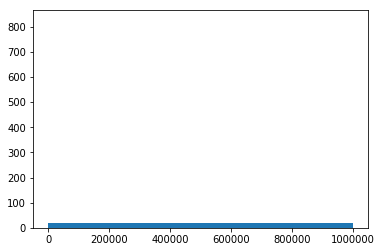

In [162]:
plt.hist(ratios_2, bins=[1, 1.1, 2, 4, 8, 16, 32, 1e6])

In [32]:
mg.ratios

[1.0024689311393686,
 8.9146864206138421,
 1.0,
 1.0000846692278722,
 1.0001933818594173,
 1.0002009381050205,
 1.0000000000000002,
 1.0313085998654772,
 1.0,
 1.0006341615054348,
 1.0,
 1.1028908367810542,
 5.0078461934478185,
 1.7444822479516351,
 1.0,
 1.0,
 1.0,
 5.0754325146902151,
 1.994798500130021,
 1.0595350295112163,
 1.0,
 1.0,
 1.588005198658804,
 1.0721700813386232,
 5.340145308246365,
 1.3814286190647871,
 1.0,
 1.0,
 5.1397633677381371,
 1.0203790117387133,
 1.3458787714260558,
 1.0,
 2.4627124077020364,
 1.0,
 1.0428136403617809,
 1.0282173608522847,
 1.0,
 1.0,
 1.0096145837828734,
 1.0122981035738996,
 1.0,
 1.4817485396656629,
 5.756067402893021,
 1.0389774165774581,
 1.700980590188764,
 1.0000292275673994,
 1.0,
 1.0,
 32.823204956845032,
 228.89904267823513]

In [42]:
mg.save(mg_path)

In [33]:
m_gly = res

In [43]:
m_gly.exchange_values

[0.000235253496422294,
 0.120884112034407,
 0.0025873822622544,
 0.109726176278784,
 0.0622621690420671,
 0.0164657626128754,
 0.000240378511370286,
 0.00390097746261021,
 0.00297124710519323,
 0.245909023302167,
 0.310293179807715,
 0.124524338084134]

In [44]:
m_gly.scores(recipes[0])

[1.9736567895799773,
 1.9080250484758379,
 7.1549426834270076,
 1.0433618035686494,
 4.5093929469488963,
 0.37972556565244475,
 0.34282567874124636,
 0.25557693565544942,
 2.4545580238122446,
 1.907909564890391,
 5.4086896549761763,
 4.6516863117034823]

In [53]:
while len(mg) < 4000:
    next(mg)

completed 68 iterations
completed 68 iterations
completed 68 iterations
completed 66 iterations
completed 66 iterations
completed 66 iterations
completed 63 iterations
completed 63 iterations
completed 68 iterations
completed 68 iterations
completed 66 iterations
completed 67 iterations
completed 66 iterations
completed 59 iterations
completed 58 iterations
completed 59 iterations
completed 63 iterations
completed 62 iterations
completed 62 iterations
completed 61 iterations
completed 59 iterations
completed 68 iterations
completed 67 iterations
completed 67 iterations
completed 68 iterations
completed 67 iterations
completed 67 iterations
completed 70 iterations
completed 69 iterations
completed 69 iterations
completed 68 iterations
completed 68 iterations
completed 63 iterations
completed 63 iterations
completed 63 iterations
completed 55 iterations
completed 63 iterations
completed 66 iterations
completed 65 iterations
completed 67 iterations
completed 67 iterations
completed 67 ite

StopIteration: 

In [54]:
mg.save(mg_path)

In [56]:
from matplotlib import pyplot as plt
%matplotlib inline

In [60]:
z = [res for res in mg._results if not res.scored]

In [67]:
z[0].add_scores(mg._query)

In [72]:
[(qty.external_ref, z[0]._suppliers[1].termination) in z[0]._scores for qty in z[0].quantities]

[True, True, True, True]

In [69]:
z[0]._scores

{('ReCiPe Midpoint (H), climate change, GWP100',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.29650247604974439,
 ('ReCiPe Midpoint (H), climate change, GWP100',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.26472234167501263,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00024749437122928571,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00018000919964858612,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00051592863691869186,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00032489102513923407,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00057757389612874527,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00038825486469872743}

In [66]:
[f.index for f in z]


[22,
 59,
 61,
 65,
 187,
 214,
 243,
 292,
 330,
 335,
 359,
 535,
 569,
 647,
 657,
 669,
 671,
 685,
 691,
 717,
 737,
 772,
 872,
 879,
 889,
 914,
 966,
 971,
 1027,
 1077,
 1176,
 1184,
 1213,
 1427,
 1449,
 1457,
 1478,
 1518,
 1530,
 1557,
 1611,
 1621,
 1630,
 1665,
 1680,
 1681,
 1689,
 1696,
 1761,
 1807,
 1831,
 1841,
 1919,
 1942,
 1944,
 1954,
 1967,
 1968,
 2011,
 2040,
 2053,
 2093,
 2126,
 2186,
 2237,
 2242,
 2250,
 2254,
 2314,
 2422,
 2498,
 2502,
 2550,
 2570,
 2608,
 2690,
 2705,
 2737,
 2803,
 2809,
 2840,
 2879,
 2901,
 2918,
 2930,
 3028,
 3106,
 3154,
 3158,
 3169,
 3172,
 3280,
 3289,
 3304]

In [64]:
[k for k in z[0].suppliers]

['02254055-bc29-4d66-ad6c-749e52da95bc',
 '1034822d-dca5-4742-82dd-a00864336d7b']

In [62]:
z[0]._scores

{('ReCiPe Midpoint (H), climate change, GWP100',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.29650247604974439,
 ('ReCiPe Midpoint (H), climate change, GWP100',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.26472234167501263,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00024749437122928571,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00018000919964858612,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00051592863691869186,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00032489102513923407,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00057757389612874527,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00038825486469872743}

In [73]:
zz = z[0]

In [78]:
_zg = (mg[k] for k in range(len(mg)))
while 1:
    zz = next(_zg)
    zz.ratio(recipes[0])

KeyError: ('ReCiPe Midpoint (H), climate change, GWP100', '2dd650f3-4225-4356-b201-03602b5ec928')

In [82]:
for k in range(len(mg)):
    if not mg[k].scored:
        mg[k].add_scores(mg._query)

completed 64 iterations
completed 68 iterations


In [81]:
zz.scored

False

In [76]:
zz.ratio(recipes[0])

1.1200508206963007

In [75]:
[str(x) for x in zz.market.inventory()]

['Output: {*} [1 [kg]]     hard coal [CPC: 11010: Hard coal]',
 ' Input:     [ ---  [kWh]] (#) electricity, medium voltage [CPC: 17100: Electrical energy]',
 ' Input:     [ ---  [metric ton*km]] (#) transport, freight train [CPC: 6512: Railway transport services of freight]',
 ' Input:     [ ---  [kg]] (o) hard coal [CPC: 11010: Hard coal]',
 ' Input:     [ ---  [kg]] (#) hard coal [CPC: 11010: Hard coal]',
 'Output:     [ ---  [kg]]     Tin, ion (CAS 022537-50-4) [ground-]',
 'Output:     [ ---  [kg]]     BOD5, Biological Oxygen Demand [ground-]',
 'Output:     [ ---  [kg]]     Iron, ion (CAS 015438-31-0) [ground-]',
 'Output:     [ ---  [kg]]     Dissolved solids [ground-]',
 'Output:     [ ---  [kg]]     Arsenic, ion (CAS 017428-41-0) [ground-]',
 ' Input:     [ ---  [m2]]     Transformation, from unspecified [land]',
 ' Input:     [ ---  [m2]]     Transformation, to industrial area [land]',
 ' Input:     [ ---  [m2*year]]     Occupation, industrial area [land]',
 'Output:     [ ---

In [74]:
zz.__dict__

{'_flowref': '0d3eda5a-4601-4573-9549-0701c459ab88',
 '_index': 22,
 '_market': <lcatools.entity_refs.process_ref.ProcessRef at 0x7f840fc7b7b8>,
 '_quantities': (<lcatools.entity_refs.quantity_ref.QuantityRef at 0x7f8426640cf8>,
  <lcatools.entity_refs.quantity_ref.QuantityRef at 0x7f84265e7358>),
 '_scores': {('ReCiPe Midpoint (H), climate change, GWP100',
   '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.29650247604974439,
  ('ReCiPe Midpoint (H), climate change, GWP100',
   '1034822d-dca5-4742-82dd-a00864336d7b'): 0.26472234167501263,
  ('ReCiPe Midpoint (H), marine eutrophication, MEP',
   '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00024749437122928571,
  ('ReCiPe Midpoint (H), marine eutrophication, MEP',
   '1034822d-dca5-4742-82dd-a00864336d7b'): 0.00018000919964858612,
  ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
   '02254055-bc29-4d66-ad6c-749e52da95bc'): 0.00051592863691869186,
  ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
   '1034822d-dca5-

(array([  1.16000000e+02,   2.76400000e+03,   2.19000000e+02,
          1.06000000e+02,   8.90000000e+01,   1.60000000e+01,
          2.20000000e+01,   1.00000000e+00,   8.00000000e+00]),
 array([    0,     1,     2,     5,    10,    50,   100,   500,  1000, 25000]),
 <a list of 9 Patch objects>)

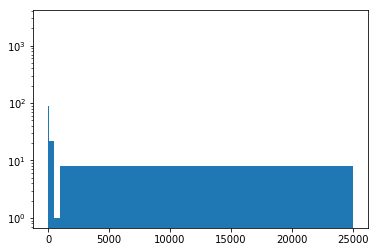

In [90]:

plt.hist(mg.ratios_for_quantity(recipes[17]), log=True, bins=[0, 1, 2, 5, 10, 50, 100, 500, 1000, 25000])

In [92]:
len(mg)

3341

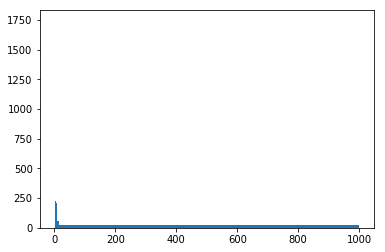

In [109]:
vals, bins, _ = plt.hist([mg[k].size for k in range(len(mg))], bins=(1, 2, 3, 4, 8, 16, 1000))

In [106]:
vals

array([ 1072.,  1975.,   211.,    56.,    27.])

In [107]:
bins

array([   1,    2,    4,    8,   16, 1000])

['1-2', '2-4', '4-8', '8-16', '16-1000']

In [120]:
bins

array([   1,    2,    3,    4,    8,   16, 1000])

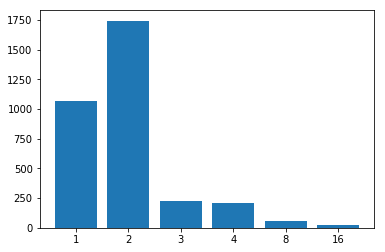

In [119]:

ax = plt.axes()
plt.bar(range(len(vals)), vals, axes=ax)
ax.set_xticks(range(len(vals)))
ax.set_xticklabels(bins[:-1])

In [41]:
m_gly.ratio(recipes[2])

23.288168414796846

In [30]:
[x for x in res._res_by_quantity(res.max_ratio[1])]

[0.044470927796098098,
 0.036857973467069489,
 0.015323414858947856,
 0.0014396813673304564,
 0.0037757955677162991,
 0.00035519573640994181,
 0.00029287404698509685,
 0.00019428184266638096,
 0.013081794434715077,
 0.036878982583998153,
 0.013055297155598508,
 0.004005639532987275]

In [31]:
[x for x in res._res_by_quantity(recipes[0])]

[4.1830616229411071,
 3.6918878823664345,
 7.1695381198251784,
 1.057799131779348,
 4.6747297322146704,
 0.38560776417324488,
 0.50918023486057262,
 0.63827539674663203,
 4.3847127808104354,
 3.6911544776432712,
 5.4339359009360271,
 4.7907412143401693]

In [32]:
res.exchange_values

[0.000235253496422294,
 0.120884112034407,
 0.0025873822622544,
 0.109726176278784,
 0.0622621690420671,
 0.0164657626128754,
 0.000240378511370286,
 0.00390097746261021,
 0.00297124710519323,
 0.245909023302167,
 0.310293179807715,
 0.124524338084134]

In [34]:
recipes[0].do_lcia(res.market.lci()).total()

completed 63 iterations


4.1368692496949286

In [35]:
evs = res.exchange_values
sum(evs[i] * v for i, v in enumerate(res._res_by_quantity(recipes[0])))

4.0853070765007597

In [37]:
[str(x) for x in res.market.inventory(res._flowref)]

[' Input:     [0.209 [metric ton*km]] (#) transport, freight, lorry, unspecified [By-product classification: allocatable product]',
 ' Input:     [0.599 [metric ton*km]] (#) transport, freight, sea, transoceanic ship [CPC: 65219: Other coastal and transoceanic water transport services of other freight]',
 ' Input:     [0.309 [metric ton*km]] (#) transport, freight train [CPC: 6512: Railway transport services of freight]',
 ' Input:     [0.0246 [metric ton*km]] (#) transport, freight, inland waterways, barge [CPC: 65229: Other inland water transport services of freight]',
 ' Input:     [0.000235 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]',
 ' Input:     [0.121 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]',
 ' Input:     [0.00259 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]',
 ' Input:     [0.11 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]',
 ' Input:     [0.0623 [kg]] (#) glycerine (CAS 000056-81-5) [CPC: 34570: Glycerol]

In [38]:
xval = [x for x in res._res_by_quantity(recipes[0])]
yval = res.exchange_values

In [39]:
from matplotlib import pyplot as plt
%matplotlib inline

<Container object of 12 artists>

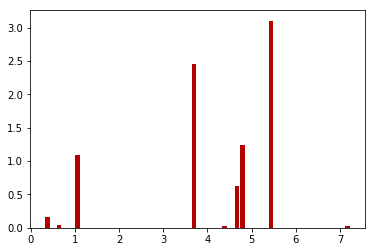

In [45]:
width = 0.1
scl = 1 / width
plt.bar(xval, [k * scl for k in yval], width=width, color=[0.7, 0, 0])

In [28]:
res.market.show()

ProcessRef catalog reference (037fa5e4-f711-4987-b50a-38920ca5d5a0)
origin: local.ecoinvent.3.4.cutoff
UUID: 037fa5e4-f711-4987-b50a-38920ca5d5a0
   Name: market for glycerine
Comment: no comment.
==Local Fields==
           Name: market for glycerine
   SpatialScope: GLO
  TemporalScope: {'begin': '2011-01-01', 'end': '2017-12-31'}
Classifications: ['ISIC rev.4 ecoinvent: 2011:Manufacture of basic chemicals', 'EcoSpold01Categories: chemicals/organics']
        Comment: no comment.


In [29]:
res._flowref

'3d3268fa-3c9e-43e0-be88-3dfd53718719'

In [18]:
_rg = (k for k in mg._results)

In [42]:
mkt = mg[14].market

In [45]:
invs = [x for x in mkt.inventory(mkt.reference())]

In [46]:
cat.query('local.ecoinvent.3.4.cutoff').get(invs[0].termination).show()

ProcessRef catalog reference (d0c11643-6c16-4cec-a083-89ba4bfa2db6)
origin: local.ecoinvent.3.4.cutoff
UUID: d0c11643-6c16-4cec-a083-89ba4bfa2db6
   Name: land already in use, annual cropland to perennial crop
Comment: This dataset represents the interventions associated with the provision of 1 kg NPP (Net Primary Productivity of a given land, in kg C / m2 and year) by land that is already in use as arable land. NPP and VEG (above-ground biomass, below-ground biomass and dead organic matter) values are parameterized.
NPP values are reported by Haberl et al. (2007)
VEG values have the following sources:
- Forests: Global Forest Resources Assessment 2010: http://www.fao.org/forestry/fra/fra2010/en/
- Grassland: IPCC 2006 Guidelines, Volume 6, Table 6.4. All values in tonne C/ha, converted to carbon based on 47% carbon content of dry matter biomass (see for example section 6.2.1.4 of IPCC 2006).
- Crops: Cveg croplands, based on Table 11 of the European Commission decision.* All values in

In [36]:
next(_rg)._scores

{('ReCiPe Midpoint (H), climate change, GWP100',
  'a33ea50e-741b-4b90-9c1b-2e9bf9376aea'): 0,
 ('ReCiPe Midpoint (H), climate change, GWP100',
  'd0c11643-6c16-4cec-a083-89ba4bfa2db6'): -28.747731397459201,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  'a33ea50e-741b-4b90-9c1b-2e9bf9376aea'): 0,
 ('ReCiPe Midpoint (H), marine eutrophication, MEP',
  'd0c11643-6c16-4cec-a083-89ba4bfa2db6'): 0,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  'a33ea50e-741b-4b90-9c1b-2e9bf9376aea'): 0,
 ('ReCiPe Midpoint (H), photochemical oxidant formation, POFP',
  'd0c11643-6c16-4cec-a083-89ba4bfa2db6'): 0,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  'a33ea50e-741b-4b90-9c1b-2e9bf9376aea'): 0,
 ('ReCiPe Midpoint (H), terrestrial acidification, TAP100',
  'd0c11643-6c16-4cec-a083-89ba4bfa2db6'): 0}

In [15]:
mg.ratios

ValueError: max() arg is an empty sequence

In [27]:
res.unique(recipes[17])

8

In [12]:
[res.ratio(k) for k in res.quantities]

ValueError: max() arg is an empty sequence

In [2]:
brick = next(cat.query('local.ecoinvent.3.4.cutoff').processes(Name=('brick', 'sand', 'lime'), SpatialScope='DE'))

Loading JSON data from /data/GitHub/2018/bw2-uncertainty/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz:
local.ecoinvent.3.4.cutoff.index__20180905: /data/GitHub/2018/bw2-uncertainty/catalog/index/ffc0f70037f9e921067e85ac7e2d4ff0ba1bc3b5.json.gz
local.ecoinvent.3.4.cutoff: /data/LCI/Ecoinvent/3.4/ecoinvent 3.4_cutoff_ecoSpold02
13459 new process entities added (13459 total)
19 new quantity entities added (19 total)
4881 new flow entities added (4881 total)


In [3]:
brick.show()

ProcessRef catalog reference (5e2a6f63-1c69-4e74-b41d-13bc15431144)
origin: local.ecoinvent.3.4.cutoff
UUID: 5e2a6f63-1c69-4e74-b41d-13bc15431144
   Name: sand-lime brick production
Comment: This dataset represents the production of 1 kg of sand-lime brick. It is assumed a company that has a yearly production of 120.000 tons and a lifespan of 50 years. The air emissions should all stem from combustion processes, and additional air emissions are not measured.
==Local Fields==
           Name: sand-lime brick production
   SpatialScope: DE
  TemporalScope: {'begin': '1993-01-01', 'end': '2017-12-31'}
Classifications: ['EcoSpold01Categories: construction materials/bricks', 'ISIC rev.4 ecoinvent: 2395:Manufacture of articles of concrete, cement and plaster']
        Comment: This dataset represents the production of 1 kg of sand-lime brick. It is assumed a company that has a yearly production of 120.000 tons and a lifespan of 50 years. The air emissions should all stem from combustion proc

In [11]:
q = recipes[17]

In [12]:
res = q.do_lcia(brick.lci())

completed 63 iterations


In [14]:
res.show_components()

ReCiPe Midpoint (H), marine eutrophication, MEP [kg N-Eq] [LCIA] kg N-Eq
------------------------------------------------------------
  3.63e-05  local.ecoinvent.3.4.cutoff/77357947-ccc5-438e-9996-95e65e1e1bce Nitrogen oxides [kg]
  3.03e-05  local.ecoinvent.3.4.cutoff/c1b91234-6f24-417b-8309-46111d09c457 Nitrogen oxides [kg]
  1.59e-05  local.ecoinvent.3.4.cutoff/d068f3e2-b033-417b-a359-ca4f25da9731 Nitrogen oxides [kg]
  4.93e-06  local.ecoinvent.3.4.cutoff/b61057a3-a0bc-4158-882e-b819c4797419 Nitrate [kg]
  1.07e-06  local.ecoinvent.3.4.cutoff/7ce56135-2ca5-4fba-ad52-d62a34bfeb35 Nitrate [kg]
   6.8e-07  local.ecoinvent.3.4.cutoff/15cfc784-a719-4230-ad2e-f4104d56c427 Nitrogen, organic bound [kg]
  6.78e-07  local.ecoinvent.3.4.cutoff/13331e67-6006-48c4-bdb4-340c12010036 Ammonium, ion [kg]
  6.72e-07  local.ecoinvent.3.4.cutoff/0f440cc0-0f74-446d-99d6-8ff0e97a2444 Ammonia [kg]
  3.65e-07  local.ecoinvent.3.4.cutoff/87883a4e-1e3e-4c9d-90c0-f1bea36f8014 Ammonia [kg]
  3.24e-07  local.e

In [23]:
enum(res._archive.catalog_names)

 [00] local.lcia.ecoinvent.3.1.2014_08_13
 [01] local.lcia.ecoinvent.3.1.2014_08_13.index__20180906


['local.lcia.ecoinvent.3.1.2014_08_13',
 'local.lcia.ecoinvent.3.1.2014_08_13.index__20180906']

In [24]:
res._archive.write_to_file('/data/GitHub/2018/bw2-uncertainty/catalog/index/55f083125ba933efd855bc1644b2be829d032796.json.gz',
                          gzip=True, characterizations=False, values=False)

TypeError: Object of type 'LcUnit' is not JSON serializable

In [19]:
cat.index_resource('local.lcia.ecoinvent.3.1.2014_08_13')

local.lcia.ecoinvent.3.1.2014_08_13.index__20180906: /data/GitHub/2018/bw2-uncertainty/catalog/index/55f083125ba933efd855bc1644b2be829d032796.json.gz


TypeError: serialize() got an unexpected keyword argument 'exchanges'

In [139]:
[k for k in cat.references]

['local.ecoinvent.3.4.apos',
 'local.ecoinvent.3.4.apos.index__20180905',
 'local.ecoinvent.3.4.conseq',
 'local.ecoinvent.3.4.cutoff',
 'local.ecoinvent.3.4.cutoff.index__20180905',
 'local.lcia.ecoinvent.3.1.2014_08_13',
 'local.qdb']

In [143]:
sorted(k['Name'] for k in cat.query('local.ecoinvent.3.4.cutoff').processes(Name=('soybean')))

['esterification of soybean oil',
 'esterification of soybean oil',
 'esterification of soybean oil',
 'fatty acid production, from soybean oil',
 'fatty acid production, from soybean oil',
 'market for soybean',
 'market for soybean beverage',
 'market for soybean meal',
 'market for soybean oil, crude',
 'market for soybean oil, refined',
 'market for soybean seed, for sowing',
 'market for soybean seed, organic, for sowing',
 'market for soybean, Swiss integrated production',
 'market for soybean, feed',
 'market for soybean, organic',
 'soybean beverage production',
 'soybean beverage production',
 'soybean meal and crude oil production',
 'soybean meal and crude oil production',
 'soybean meal and crude oil production',
 'soybean meal and crude oil production',
 'soybean meal and crude oil production, mechanical extraction',
 'soybean meal and crude oil production, mechanical extraction',
 'soybean meal to generic market for protein feed',
 'soybean oil refinery operation',
 'soyb

In [144]:
q = cat.query('local.ecoinvent.3.4.cutoff')

In [145]:
mkt = next(q.processes(Name='soybean, feed production'))

In [150]:
[str(k) for k in mkt.inventory(mkt.reference())]

[' Input:     [8.5e-06 [m3]] (#) building, multi-storey [CPC: 531: Buildings]',
 ' Input:     [1 [kg]] (#) soybean [CPC: 01412: Soya beans, other]',
 ' Input:     [0.033 [MJ]] (#) heat, district or industrial, natural gas [CPC: 17300: Steam and hot water]',
 ' Input:     [0.062 [MJ]] (#) heat, district or industrial, natural gas [CPC: 17300: Steam and hot water]',
 ' Input:     [0.000248 [kWh]] (#) electricity, low voltage [CPC: 17100: Electrical energy]',
 ' Input:     [4.76e-05 [kWh]] (#) electricity, low voltage [CPC: 17100: Electrical energy]',
 ' Input:     [0.00105 [kWh]] (#) electricity, low voltage [CPC: 17100: Electrical energy]',
 ' Input:     [0.000465 [kWh]] (#) electricity, low voltage [CPC: 17100: Electrical energy]',
 ' Input:     [0.000749 [kWh]] (#) electricity, low voltage [CPC: 17100: Electrical energy]',
 ' Input:     [0.012 [kWh]] (#) electricity, low voltage [CPC: 17100: Electrical energy]',
 ' Input:     [0.00438 [kWh]] (#) electricity, low voltage [CPC: 17100: E